# Simplified Pac-Man: A Study of AI Search Algorithms

---

In this notebook, we embark on a journey to explore the fascinating world of search algorithms within the realm of AI, using the classic and well-loved game of Pac-Man as our case study. Our aim is to understand and implement a variety of search strategies to navigate the Pac-Man through a maze. This simplified version of the game provides a perfect setting to delve into both uninformed (blind) and informed (heuristic-based) search algorithms, crucial in the field of Artificial Intelligence.

The algorithms we will explore include:

### Uninformed Search Algorithms:
- **Breadth-First Search (BFS)**: Known for its completeness and simplicity, BFS explores the maze level by level, ensuring no spot is missed.
- **Depth-First Search (DFS)**: This algorithm takes a deeper dive into the maze, exploring paths to their fullest before backtracking, often leading to more efficient solutions in certain scenarios.
- **Depth-Limited Search (DLS)**: A variant of DFS, DLS adds a depth limitation to prevent wandering infinitely in loops.
- **Iterative Deepening Search (IDS)**: Combining the virtues of BFS's completeness and DFS's space efficiency, IDS progressively deepens the search.
- **Uniform Cost Search (UCS)**: Prioritizing paths based on their cumulative cost, UCS is ideal for finding the least costly path in terms of distance or other metrics.

### Informed Search Algorithms:
- **Greedy Search**: Focusing on the most promising path, Greedy Search can be efficient but lacks completeness.
- **A\* Search**: A sophisticated algorithm that combines the best of both worlds – it's both complete and optimal, efficiently finding the shortest path using heuristics.

Each algorithm has its unique characteristics and is suitable for different types of mazes and objectives. Through this exploration, we will not only understand these algorithms theoretically but also see them in action as we program Pac-Man to navigate the maze, find the dots, and avoid ghosts.

As we progress, we'll discuss the implementation details, strengths, and limitations of each algorithm, providing a comprehensive understanding of AI's approach to problem-solving in games and beyond.

So, let's gear up to dive into the code, unravel these algorithms, and bring Pac-Man to life in this AI-powered maze adventure!

---


## Introduction to Our Simplified Pac-Man Game

Dive into the world of AI pathfinding with our simplified version of the iconic ```Pac-Man``` game. Unlike the traditional game (https://en.wikipedia.org/wiki/Pac-Man), this simplified version focuses purely on strategic movement and pathfinding, essential components in the field of Artificial Intelligence. In this game, our Pac-Man has to navigate through a maze to eat all four foods placed in each corner, but **without** the challenge of evading ghosts. This setup provides an excellent scenario for understanding and applying different search algorithms.

### Game Setup and Visualization:

- **Maze Layout**: The game is played on a grid-based maze, similar to the classic Pac-Man, but with a twist. Here, the maze consists of walkable paths and walls.
- **Colors in the Maze**:
  - **Red**: Represents the food items placed in each corner of the maze.
  - **Yellow**: Denotes the starting position of Pac-Man.
  - **Black**: Indicates the walls or barriers in the maze that Pac-Man cannot pass through.
  - **White**: Signifies walkable paths where Pac-Man can move.
  - **Blue**: Shows the path taken by Pac-Man to reach the food.

### Objectives:

1. **Pathfinding Challenge**: The primary goal is to find the shortest path for Pac-Man to eat all four foods placed in the maze's corners. 
2. **Search Algorithms**: To achieve this, we will employ various search algorithms, both uninformed and informed, each offering a unique approach to solving the maze.
3. **Visualization**: After applying each algorithm, the resultant path taken by Pac-Man will be visualized on the maze. This will not only showcase the algorithm's effectiveness but also provide visual feedback on the strategy used by Pac-Man.

---


### Essential Libraries

Let's begin by importing the essential Python libraries.

In [11]:
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from copy import deepcopy
from math import inf
import heapq

### Visualize the Maze

Setting up our simplified Pac-Man game environment.

In [12]:
'''
USAGE EXAMPLE

# Visualize a blank maze
show_maze(sample_maze)

# Visualize a maze with Pac-Man at (5, 6)
show_maze(sample_maze, (5, 6))

# List storing valid cell coordinates
path = [[6, 6], [6, 5], [6, 4], [5, 4], [5, 3], [5, 2], [5, 1], [4, 1], [3, 1], [2, 1]]

# Visualize the searched maze
show_maze(sample_maze, (5, 6), path)

'''


# Edit this for your own maze design
blank_maze = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# For testing
sample_maze = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
               [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
               [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
               [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
               [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
               [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
               [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
               [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
               [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1],
               [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
               [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
               [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


    
# Visualises the maze corresponding to grid passed in
def show_maze(grid, start=None, path=None, show_corners=[1, 1, 1, 1], CELL_SIZE=3):
    # Make a copy of the maze
    grid_copy = deepcopy(grid)
    
    color_map = {
        "white": 0,
        "black": 1,
        "yellow": 2,
        "blue": 3,
        "red": 4
    }
    
    # Input validation
    # if not valid_maze(grid):
    #    raise ValueError("Maze is incomplete! Must have all four colors")
    
    # Add path to the maze
    if path:
        grid_copy = add_path(grid_copy, path)
    
    # Add color for four corners
    corners = [(1, 1), (1, len(grid[0]) - 2), (len(grid) - 2, 1), (len(grid) - 2, len(grid[0]) - 2)]
    for i in range(4):
        if show_corners[i]:
            grid_copy[corners[i][0]][corners[i][1]] = color_map["red"]
        
    # Add Pac-Man to the maze
    if start:
        grid_copy[start[0]][start[1]] = color_map["yellow"]
    
    # Define the colors for specific values
    colors = color_map.keys()
    
    # Create a colormap with distinct colors for specific values
    cmap = ListedColormap(colors)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(CELL_SIZE, CELL_SIZE))

    # Draw the grid with the custom colormap
    ax.imshow(grid_copy, cmap=cmap, interpolation='nearest')

    # Hide the axes labels
    ax.axis('off')

    # Display the plot
    plt.show()


# Visualises the complete solution found by a search
# Works by displaying each segment of the solution path with a copy of the maze
def show_solution(maze, start, path):
    corners = [(1, 1), (1, len(maze[0]) - 2), (len(maze) - 2, 1), (len(maze) - 2, len(maze[0]) - 2)]
    label = [1, 1, 1, 1]
    for segment in path:
        show_maze(maze, segment[0], segment, label)
        label[corners.index(segment[-1])] = 0


    
# Helper function
# Accepts a list of coordinates of the path squares
# Checks if all path squares are valid before adding them to the maze grid
def add_path(grid, path):
    for coords in range(len(path)):
        x, y = path[coords]
        if grid[x][y] == 1:
            raise ValueError(f"Invalid path! Failed to add ({x}, {y})")
        grid[x][y] = 3
    
    return grid
        

# Determines maze validity 
def valid_maze(grid):
    yellow = red = False
    
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if grid[i][j] == 2:
                yellow = True
            elif grid[i][j] == 4:
                red = True
    
    return yellow and red


# Count the number of steps
def count_steps(path):
    count = 0
    for segment in path:
        count += len(segment)

    return (count - 4)

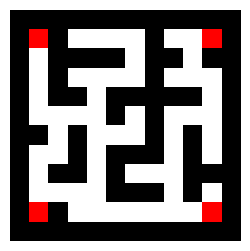

In [13]:
show_maze(sample_maze)

---

## Breadth-first Search (BFS)

This algorithm iterates through the maze using a queue, expanding to neighboring cells until it reaches each corner. If a corner is encountered, it is removed from the list of remaining corners to visit. The function returns a list of segments, where each segment represents a path from the starting point to one of the corners. Finally, the `show_solution` function visualizes the maze and the complete path that passes through all four corners.

<br/>

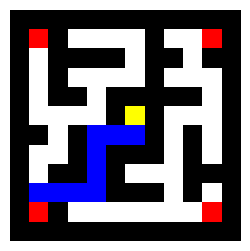

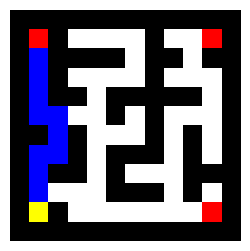

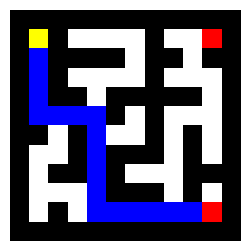

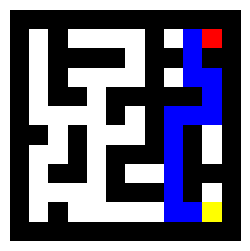

In [14]:
def bfs(maze, start):
    corners = [(1, 1), (1, len(maze[0]) - 2), (len(maze) - 2, 1), (len(maze) - 2, len(maze[0]) - 2)]
    
    # Record segments of complete path
    path_full = []
    
    # Define the four possible directions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while len(corners):    
        # Initialize a queue for BFS
        queue = deque([(start, [start])])

        # Initialize a set to keep track of visited cells
        visited = set()

        # Mark the start cell as visited
        visited.add(start)

        # Perform BFS
        while queue:
            current_cell, path = queue.popleft()

            if current_cell in corners:
                path_full.append(path)
                corners.remove(current_cell)
                start = current_cell
                break

            for direction in directions:
                new_cell = (current_cell[0] + direction[0], current_cell[1] + direction[1])
                if 0 <= new_cell[0] < len(maze) and 0 <= new_cell[1] < len(maze[0]) and maze[new_cell[0]][new_cell[1]] != 1 and new_cell not in visited:
                    queue.append((new_cell, path + [new_cell]))
                    visited.add(new_cell)
    
    
    return path_full



# Breadth-first search
start = (5, 6)
bfs_path = bfs(sample_maze, start)
show_solution(sample_maze, start, bfs_path)

### Efficiency of the Path

Now that we have applied the `Breadth First Search` algorithm to find a path for Pac-Man, let's evaluate the efficiency of the path. We will count the number of steps Pac-Man must take to traverse the path provided by the algorithm. This count helps us understand the practical implications of each algorithm's strategy and efficiency.


In [15]:
print(f"The number of steps taken by Pac-Man to complete the path is: {count_steps(bfs_path)}")

The number of steps taken by Pac-Man to complete the path is: 54


---

### Alternative Implementation

Although BFS is still used here, we feel that this is not the best solution to the maze problem, as in this implementation, BFS is applied to ALL the possible corner visiting sequences and the best path is selected.

<br/>

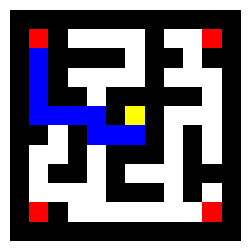

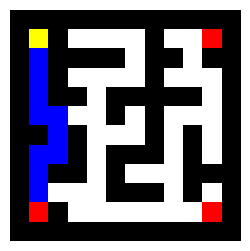

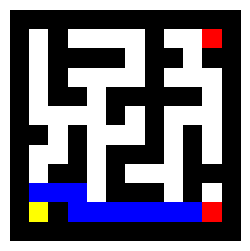

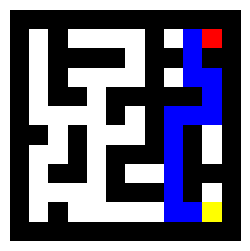

In [17]:
def bfs(maze, start, end):
    # Define the four possible directions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # Initialize a queue for BFS
    queue = deque([(start, [start])])
    
    # Initialize a set to keep track of visited cells
    visited = set()
    
    # Mark the start cell as visited
    visited.add(start)
    
    # Perform BFS
    while queue:
        current_cell, path = queue.popleft()
        if current_cell == end:
            return path
        
        for direction in directions:
            new_cell = (current_cell[0] + direction[0], current_cell[1] + direction[1])
            if 0 <= new_cell[0] < len(maze) and 0 <= new_cell[1] < len(maze[0]) and maze[new_cell[0]][new_cell[1]] != 1 and new_cell not in visited:
                queue.append((new_cell, path + [new_cell]))
                visited.add(new_cell)
    
    return None


def bfs_alt(maze, start):
    
    corners = [(1, 1), (1, len(maze[0]) - 2), (len(maze) - 2, 1), (len(maze) - 2, len(maze[0]) - 2)]
    
    # Generate all possible corner visiting sequences
    seq = list(permutations(corners))
    
    # Assume first path found is optimal
    min_path = []
    min_path.append(bfs(maze, start, seq[0][0]))
    for i in range(3):
        min_path.append(bfs(maze, seq[0][i], seq[0][i+1]))
    min_cost = sum([len(segment) for segment in min_path])
    
    # Find the path with minimum cost
    for i in range(1, len(seq)):
        path = []
        path.append(bfs(maze, start, seq[i][0]))
        for j in range(3):
            path.append(bfs(maze, seq[i][j], seq[i][j+1]))
        length = sum([len(segment) for segment in path])
        if length < min_cost:
            min_path = path
            min_cost = length
            
    return min_path


def permutations(nums):
    if len(nums) == 1:
        return [nums]
    
    result = []
    for i in range(len(nums)):
        current_num = nums[i]
        remaining_nums = nums[:i] + nums[i+1:]
        sub_permutations = permutations(remaining_nums)
        for perm in sub_permutations:
            result.append([current_num] + perm)
    
    return result


        
# Breadth-first search
start = (5, 6)
bfs_alt_path = bfs_alt(sample_maze, start)
show_solution(sample_maze, start, bfs_alt_path)

### Efficiency of the Path

In [18]:
print(f"The number of steps taken by Pac-Man to complete the path is: {count_steps(bfs_alt_path)}")

The number of steps taken by Pac-Man to complete the path is: 48
